# Chapter 4 exercises

In [20]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame for easier handling
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Display the first few rows of the dataset
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [21]:
X = iris.data
#y = (iris.target == 0).astype(np.float32)  # Binary classification: class 0 vs. others
y = iris.target  # Multi-class classification

In [22]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## full Numpy implementation


Iteration 0: Loss = 1.098612288668107, Accuracy = 80.00%
Iteration 100: Loss = 0.6506742980421142, Accuracy = 86.67%
Iteration 200: Loss = 0.5302555472930268, Accuracy = 90.00%
Iteration 300: Loss = 0.4724024346027137, Accuracy = 90.00%
Iteration 400: Loss = 0.4363672529615082, Accuracy = 90.00%
Iteration 500: Loss = 0.4107698557498471, Accuracy = 90.00%
Iteration 600: Loss = 0.3910721536497021, Accuracy = 93.33%
Iteration 700: Loss = 0.37506773688897777, Accuracy = 93.33%
Iteration 800: Loss = 0.36154785648979737, Accuracy = 93.33%
Iteration 900: Loss = 0.3497953555890682, Accuracy = 93.33%


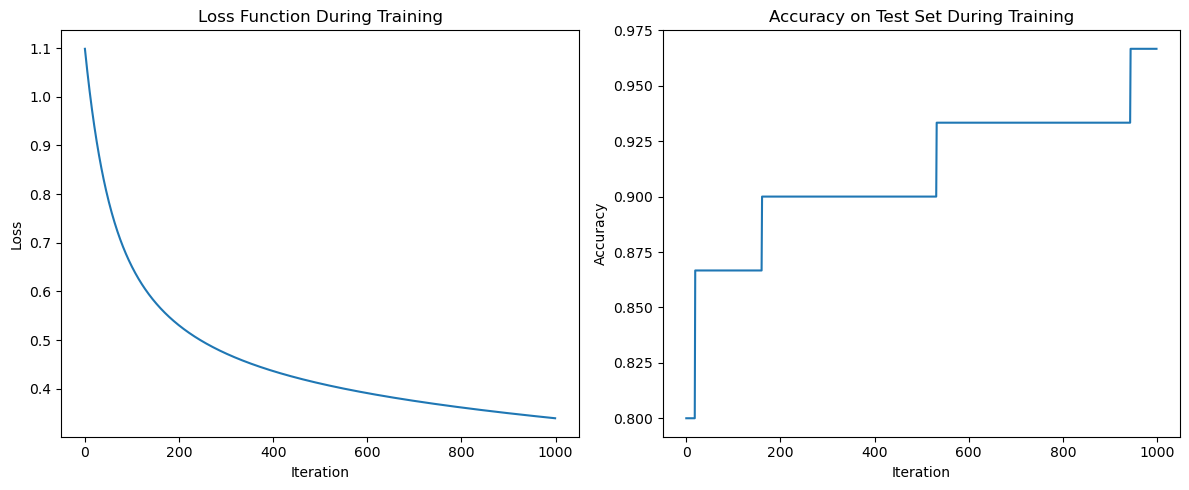

In [23]:

# Initialize the weights
def initialize_weights(n_features, n_classes):
    weights = np.zeros((n_features, n_classes))
    bias = np.zeros(n_classes)
    return weights, bias

# Compute the softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Compute the model predictions
def predict(X, weights, bias):
    linear_output = np.dot(X, weights) + bias
    return softmax(linear_output)

# Train the model using gradient descent
def train(X, y, X_test, y_test, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    n_classes = len(np.unique(y))
    weights, bias = initialize_weights(n_features, n_classes)
    losses = []
    accuracies = []
    
    # One-hot encode the labels
    y_one_hot = np.eye(n_classes)[y]
    
    for i in range(num_iterations):
        predictions = predict(X, weights, bias)
        
        # Compute gradients
        dw = (1 / n_samples) * np.dot(X.T, (predictions - y_one_hot))
        db = (1 / n_samples) * np.sum(predictions - y_one_hot, axis=0)
        
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db
        
        # Compute loss
        loss = -np.mean(np.sum(y_one_hot * np.log(predictions + 1e-15), axis=1))
        losses.append(loss)
        
        # Compute accuracy on the test set
        test_predictions = predict(X_test, weights, bias)
        test_predictions = np.argmax(test_predictions, axis=1)
        accuracy = np.mean(test_predictions == y_test)
        accuracies.append(accuracy)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}, Accuracy = {accuracy * 100:.2f}%")
    
    return weights, bias, losses, accuracies

# Train the model
learning_rate = 0.01
num_iterations = 1000
weights, bias, losses, accuracies = train(X_train, y_train, X_test, y_test, learning_rate, num_iterations)

# Plot the loss function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function During Training')

# Plot the accuracy on the test set
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set During Training')

plt.tight_layout()
plt.show()

## pytorch implementation

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Iteration 0: Loss = 0.6162369251251221, Accuracy = 83.33%
Iteration 100: Loss = 0.4973093271255493, Accuracy = 90.00%
Iteration 200: Loss = 0.44637373089790344, Accuracy = 90.00%
Iteration 300: Loss = 0.41590896248817444, Accuracy = 93.33%
Iteration 400: Loss = 0.3943862020969391, Accuracy = 93.33%
Iteration 500: Loss = 0.3776877820491791, Accuracy = 93.33%
Iteration 600: Loss = 0.36394789814949036, Accuracy = 96.67%
Iteration 700: Loss = 0.35218557715415955, Accuracy = 96.67%
Iteration 800: Loss = 0.3418320417404175, Accuracy = 96.67%
Iteration 900: Loss = 0.3325329124927521, Accuracy = 96.67%


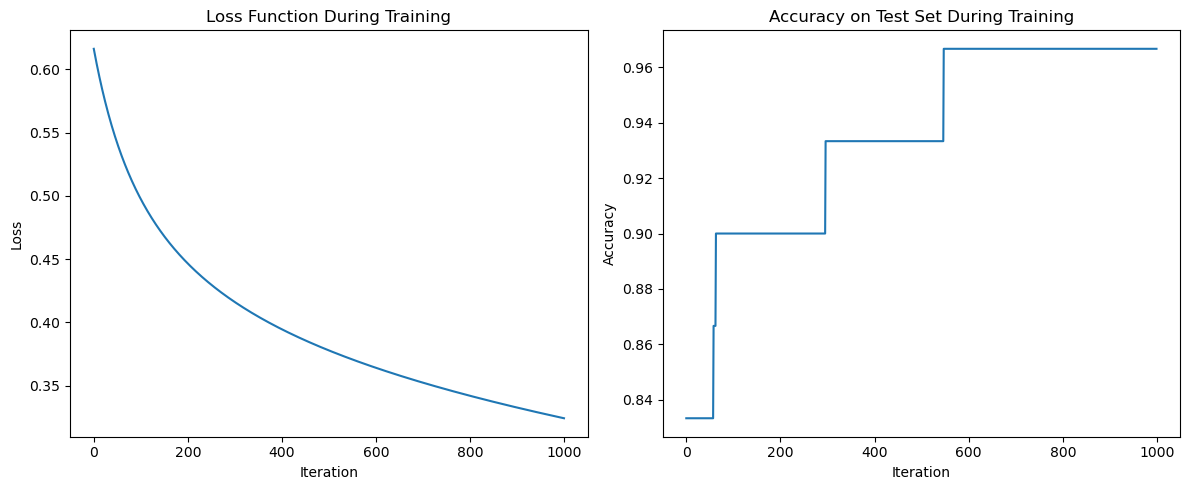

In [25]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Define the model
class SoftmaxRegression(nn.Module):
    def __init__(self, n_features, n_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(n_features, n_classes)
    
    def forward(self, x):
        return self.linear(x)

# Train the model
def train(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_iterations):
    losses = []
    accuracies = []
    
    for i in range(num_iterations):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Record the loss
        losses.append(loss.item())
        
        # Compute accuracy on the test set
        with torch.no_grad():
            test_outputs = model(X_test)
            _, predicted = torch.max(test_outputs, 1)
            accuracy = (predicted == y_test).float().mean().item()
            accuracies.append(accuracy)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss.item()}, Accuracy = {accuracy * 100:.2f}%")
    
    return losses, accuracies

# Define model, criterion, and optimizer
n_features = X_train.shape[1]
n_classes = len(torch.unique(y_train))
model = SoftmaxRegression(n_features, n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Train the model
num_iterations = 1000
losses, accuracies = train(model, criterion, optimizer, X_train, y_train, X_test, y_test, num_iterations)

# Plot the loss function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function During Training')

# Plot the accuracy on the test set
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set During Training')

plt.tight_layout()
plt.show()

## jax implementation

In [26]:
import jax.numpy as jnp
from jax import grad, jit
import matplotlib.pyplot as plt

Iteration 0: Loss = 1.0891655683517456, Accuracy = 80.00%
Iteration 100: Loss = 0.6487720012664795, Accuracy = 86.67%
Iteration 200: Loss = 0.5294882655143738, Accuracy = 90.00%
Iteration 300: Loss = 0.4719635248184204, Accuracy = 90.00%
Iteration 400: Loss = 0.43607038259506226, Accuracy = 90.00%
Iteration 500: Loss = 0.41054868698120117, Accuracy = 90.00%
Iteration 600: Loss = 0.3908964693546295, Accuracy = 93.33%
Iteration 700: Loss = 0.3749217987060547, Accuracy = 93.33%
Iteration 800: Loss = 0.3614225685596466, Accuracy = 93.33%
Iteration 900: Loss = 0.34968510270118713, Accuracy = 93.33%


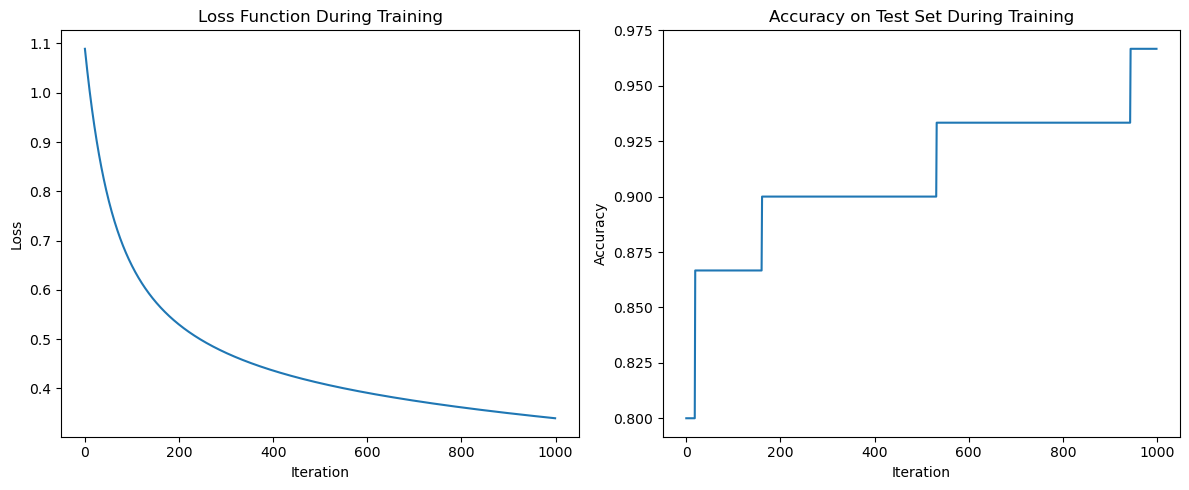

In [28]:
# Convert to JAX arrays
X_train = jnp.array(X_train)
X_test = jnp.array(X_test)
y_train = jnp.array(y_train)
y_test = jnp.array(y_test)

# Initialize the weights
def initialize_weights(n_features, n_classes):
    weights = jnp.zeros((n_features, n_classes))
    bias = jnp.zeros(n_classes)
    return weights, bias

# Compute the softmax function
def softmax(z):
    exp_z = jnp.exp(z - jnp.max(z, axis=1, keepdims=True))
    return exp_z / jnp.sum(exp_z, axis=1, keepdims=True)

# Compute the model predictions
def predict(X, weights, bias):
    linear_output = jnp.dot(X, weights) + bias
    return softmax(linear_output)

def cross_entropy_loss(weights, bias, X, y, n_classes):
    predictions = predict(X, weights, bias)
    y_one_hot = jnp.eye(n_classes)[y]
    return -jnp.mean(jnp.sum(y_one_hot * jnp.log(predictions + 1e-15), axis=1))

def accuracy(weights, bias, X, y):
    predictions = predict(X, weights, bias)
    predicted_classes = jnp.argmax(predictions, axis=1)
    return jnp.mean(predicted_classes == y)

def update(weights, bias, X, y, learning_rate, n_classes):
    loss_grad_weights = grad(cross_entropy_loss, argnums=0)(weights, bias, X, y, n_classes)
    loss_grad_bias = grad(cross_entropy_loss, argnums=1)(weights, bias, X, y, n_classes)
    weights -= learning_rate * loss_grad_weights
    bias -= learning_rate * loss_grad_bias
    return weights, bias

update = jit(update, static_argnums=(5,))

def train(X_train, y_train, X_test, y_test, learning_rate, num_iterations, n_classes):
    n_features = X_train.shape[1]
    weights, bias = initialize_weights(n_features, n_classes)
    losses = []
    accuracies = []
    
    for i in range(num_iterations):
        weights, bias = update(weights, bias, X_train, y_train, learning_rate, n_classes)
        
        # Compute loss
        loss = cross_entropy_loss(weights, bias, X_train, y_train, n_classes)
        losses.append(loss)
        
        # Compute accuracy on the test set
        acc = accuracy(weights, bias, X_test, y_test)
        accuracies.append(acc)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}, Accuracy = {acc * 100:.2f}%")
    
    return weights, bias, losses, accuracies

# Define model parameters
learning_rate = 0.01
num_iterations = 1000
n_classes = len(jnp.unique(y_train))

# Train the model
weights, bias, losses, accuracies = train(X_train, y_train, X_test, y_test, learning_rate, num_iterations, n_classes)

# Plot the loss function
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function During Training')

# Plot the accuracy on the test set
plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set During Training')

plt.tight_layout()
plt.show()